In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv('adult.csv')


In [3]:
dataset.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
dataset.tail()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
print(len(dataset))

32561


In [6]:
nana_dataset = dataset.replace('?', np.nan, inplace=True)

clean_dataset = dataset.dropna().drop(columns=['capital.loss', 'sex', 'relationship', 'education','fnlwgt']) #drop any row containing NaN 

#clean_dataset = dataset.drop('id', axis=1) # axis is to say that it is a column
print(len(clean_dataset))

#clean_dataset.head()

30162


In [7]:
#print(clean_dataset['race'].str.strip().value_counts())
#print(clean_dataset['native.country'].str.strip().value_counts())
print(clean_dataset['capital.gain'].value_counts())

capital.gain
0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
1173         1
1455         1
1086         1
401          1
Name: count, Length: 118, dtype: int64


In [8]:
clean_dataset.head()



,age,workclass,education.num,marital.status,occupation,race,capital.gain,hours.per.week,native.country,income
1,82,Private,9,Widowed,Exec-managerial,White,0,18,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,White,0,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,White,0,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,White,0,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,White,0,40,United-States,<=50K


In [9]:
clean_dataset.tail()

,age,workclass,education.num,marital.status,occupation,race,capital.gain,hours.per.week,native.country,income
32556,22,Private,10,Never-married,Protective-serv,White,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,White,0,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,White,0,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,White,0,40,United-States,<=50K
32560,22,Private,9,Never-married,Adm-clerical,White,0,20,United-States,<=50K


In [10]:
clean_dataset.describe(include="all")

,age,workclass,education.num,marital.status,occupation,race,capital.gain,hours.per.week,native.country,income
count,30162.000000,30162,30162.000000,30162,30162,30162,30162.000000,30162.000000,30162,30162
unique,NaN,7,NaN,7,14,5,NaN,NaN,41,2
top,NaN,Private,NaN,Married-civ-spouse,Prof-specialty,White,NaN,NaN,United-States,<=50K
freq,NaN,22286,NaN,14065,4038,25933,NaN,NaN,27504,22654
mean,38.437902,NaN,10.121312,NaN,NaN,NaN,1092.007858,40.931238,NaN,NaN
std,13.134665,NaN,2.549995,NaN,NaN,NaN,7406.346497,11.979984,NaN,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,0.000000,45.000000,NaN,NaN


In [11]:
clean_dataset['income'] = clean_dataset['income'].str.strip()

# 3. Map values to new column name [cite: 18, 24]
clean_dataset['>50k'] = clean_dataset['income'].map({'>50K': 1, '<=50K': 0})

# 4. NOW drop the old 'income' column
clean_dataset.drop(columns=['income'], inplace=True)

In [12]:
clean_dataset.head()

,age,workclass,education.num,marital.status,occupation,race,capital.gain,hours.per.week,native.country,>50k
1,82,Private,9,Widowed,Exec-managerial,White,0,18,United-States,0
3,54,Private,4,Divorced,Machine-op-inspct,White,0,40,United-States,0
4,41,Private,10,Separated,Prof-specialty,White,0,40,United-States,0
5,34,Private,9,Divorced,Other-service,White,0,45,United-States,0
6,38,Private,6,Separated,Adm-clerical,White,0,40,United-States,0


In [13]:
# Convert Categorical Variable to Numeric in Pandas
#encoded_dataset = pd.get_dummies(clean_dataset, drop_first=True)


le = LabelEncoder()
clean_dataset['workclass_Encoded'] = le.fit_transform(clean_dataset['workclass'])
clean_dataset['occupation_Encoded'] = le.fit_transform(clean_dataset['occupation'])
clean_dataset['race_Encoded'] = le.fit_transform(clean_dataset['race'])
clean_dataset['native.country_Encoded'] = le.fit_transform(clean_dataset['native.country'])
clean_dataset['marital.status_Encoded'] = le.fit_transform(clean_dataset['marital.status'])






In [14]:
clean_dataset = clean_dataset.drop(columns=['workclass', 'occupation', 'race', 'native.country', 'marital.status']) #drop any row containing NaN 


In [15]:
clean_dataset.head()

,age,education.num,capital.gain,hours.per.week,>50k,workclass_Encoded,occupation_Encoded,race_Encoded,native.country_Encoded,marital.status_Encoded
1,82,9,0,18,0,2,3,4,38,6
3,54,4,0,40,0,2,6,4,38,0
4,41,10,0,40,0,2,9,4,38,5
5,34,9,0,45,0,2,7,4,38,0
6,38,6,0,40,0,2,0,4,38,5


In [16]:
clean_dataset.tail()

,age,education.num,capital.gain,hours.per.week,>50k,workclass_Encoded,occupation_Encoded,race_Encoded,native.country_Encoded,marital.status_Encoded
32556,22,10,0,40,0,2,10,4,38,4
32557,27,12,0,38,0,2,12,4,38,2
32558,40,9,0,40,1,2,6,4,38,2
32559,58,9,0,40,0,2,0,4,38,6
32560,22,9,0,20,0,2,0,4,38,4


In [17]:
clean_dataset.corr(numeric_only = True) #we cannot correlate non numerical values

,age,education.num,capital.gain,hours.per.week,>50k,workclass_Encoded,occupation_Encoded,race_Encoded,native.country_Encoded,marital.status_Encoded
age,1.000000,0.043526,0.080154,0.101599,0.241998,0.080540,-0.005682,0.023374,-0.001905,-0.276373
education.num,0.043526,1.000000,0.124416,0.152522,0.335286,0.037833,0.087717,0.032805,0.091555,-0.063419
capital.gain,0.080154,0.124416,1.000000,0.080432,0.221196,0.035350,0.022162,0.014353,0.008530,-0.042418
hours.per.week,0.101599,0.152522,0.080432,1.000000,0.229480,0.050724,0.018365,0.048532,0.008408,-0.189003
>50k,0.241998,0.335286,0.221196,0.229480,1.000000,0.018044,0.051577,0.071658,0.023268,-0.193518
workclass_Encoded,0.080540,0.037833,0.035350,0.050724,0.018044,1.000000,0.015572,0.044731,0.007668,-0.034241
occupation_Encoded,-0.005682,0.087717,0.022162,0.018365,0.051577,0.015572,1.000000,0.000717,-0.003483,0.022655
race_Encoded,0.023374,0.032805,0.014353,0.048532,0.071658,0.044731,0.000717,1.000000,0.124514,-0.068627
native.country_Encoded,-0.001905,0.091555,0.008530,0.008408,0.023268,0.007668,-0.003483,0.124514,1.000000,-0.025902
marital.status_Encoded,-0.276373,-0.063419,-0.042418,-0.189003,-0.193518,-0.034241,0.022655,-0.068627,-0.025902,1.000000


<Axes: >

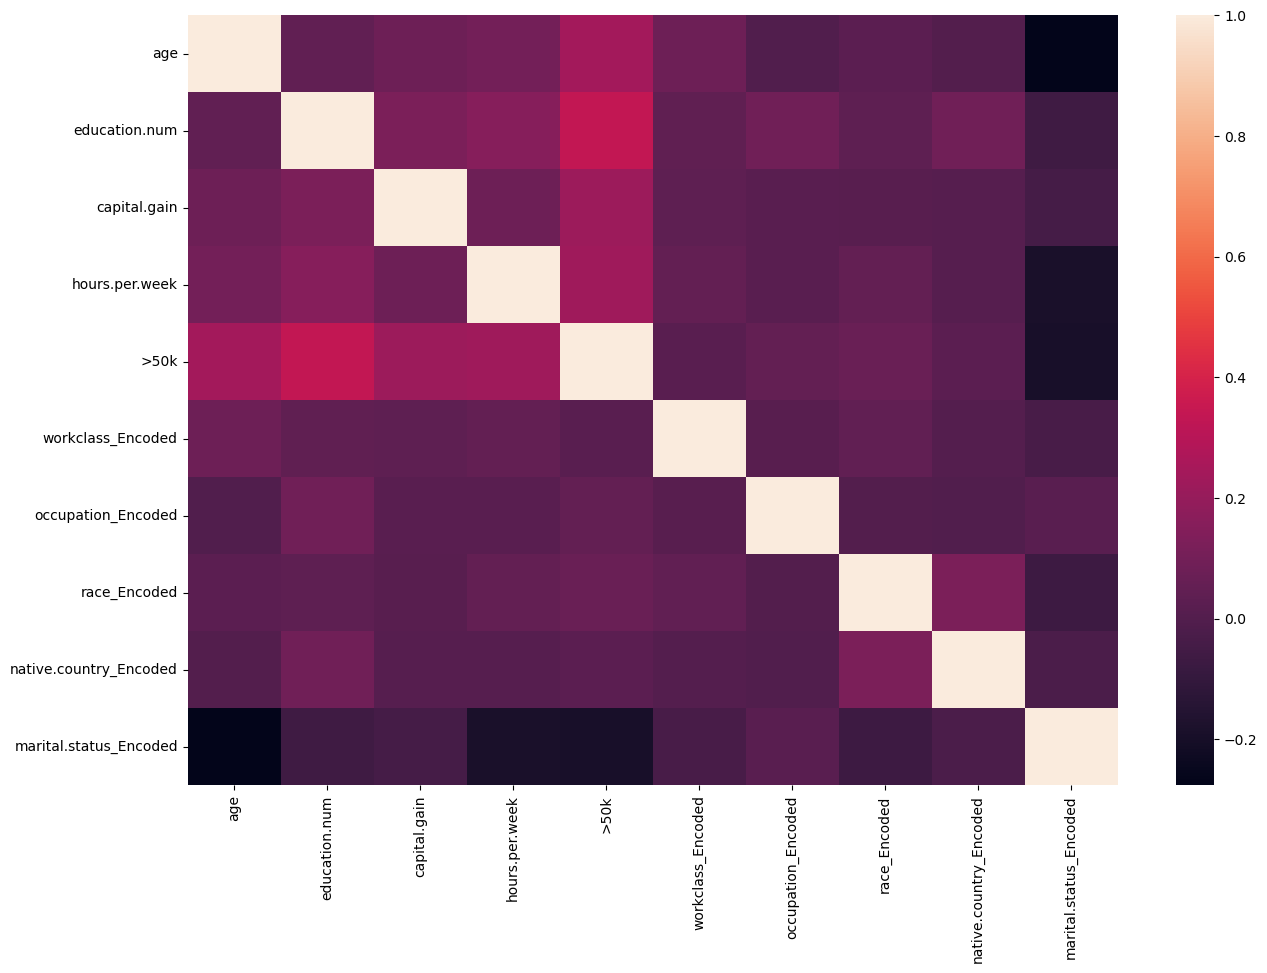

In [18]:
fig, ax = plt.subplots(figsize = (15, 10)) #Figsize helps make the figure as big or small it needs to to be able to read

sns.heatmap(clean_dataset.corr(numeric_only = True), ax = ax)

In [19]:
# Split features and target
X = clean_dataset.drop('>50k', axis=1)
y = clean_dataset['>50k']


In [20]:
y.value_counts()

>50k
0    22654
1     7508
Name: count, dtype: int64

In [21]:
# Import libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score,f1_score, roc_auc_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)




results = []


In [23]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
y_pred_DTC = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_DTC))
print("\nClassification Report:\n", classification_report(y_test, y_pred_DTC))

Accuracy: 0.8436291302906398

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      6754
           1       0.75      0.58      0.65      2295

    accuracy                           0.84      9049
   macro avg       0.81      0.76      0.78      9049
weighted avg       0.84      0.84      0.84      9049



In [25]:
#for roc-auc 
y_prob = model.predict_proba(X_test)[:, 1]

results.append({
        "Model": "Decision Tree",
        "Accuracy": accuracy_score(y_test, y_pred_DTC),
        "Precision": precision_score(y_test, y_pred_DTC, zero_division=0),
        "Recall": recall_score(y_test, y_pred_DTC, zero_division=0),
        "F1-score": f1_score(y_test, y_pred_DTC, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

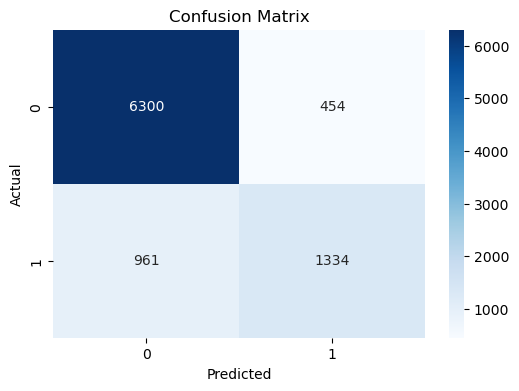

In [26]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_DTC), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred_RFC = classifier.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred_RFC))
print("\nClassification Report:\n", classification_report(y_test, y_pred_RFC))

Accuracy: 0.838324676759863

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      6754
           1       0.71      0.61      0.66      2295

    accuracy                           0.84      9049
   macro avg       0.79      0.76      0.78      9049
weighted avg       0.83      0.84      0.83      9049



In [28]:
y_prob = model.predict_proba(X_test)[:, 1]

results.append({
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test, y_pred_RFC),
        "Precision": precision_score(y_test, y_pred_RFC, zero_division=0),
        "Recall": recall_score(y_test, y_pred_RFC, zero_division=0),
        "F1-score": f1_score(y_test, y_pred_RFC, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

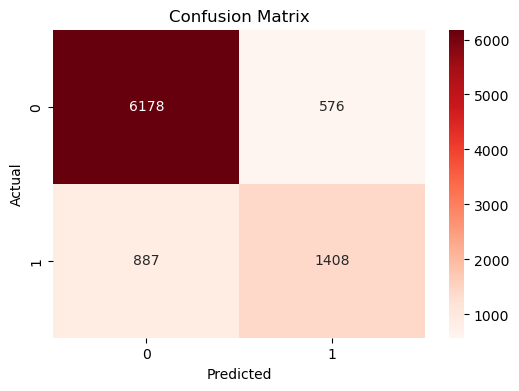

In [29]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

y_pred_logistic = clf.predict(X_test)


acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 80.35%


In [31]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      6754
           1       0.71      0.39      0.50      2295

    accuracy                           0.80      9049
   macro avg       0.76      0.67      0.69      9049
weighted avg       0.79      0.80      0.78      9049



In [32]:
y_prob = model.predict_proba(X_test)[:, 1]

results.append({
        "Model": "Logistic Regretion",
        "Accuracy": accuracy_score(y_test, y_pred_logistic),
        "Precision": precision_score(y_test, y_pred_logistic, zero_division=0),
        "Recall": recall_score(y_test, y_pred_logistic, zero_division=0),
        "F1-score": f1_score(y_test, y_pred_logistic, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

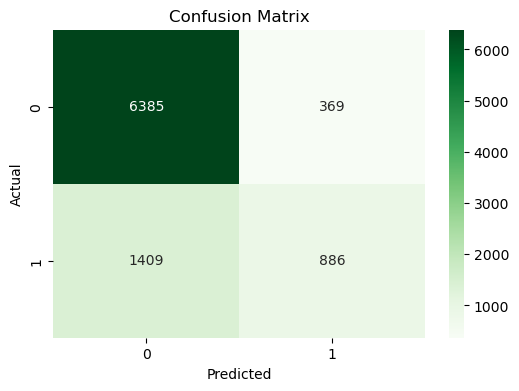

In [33]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [34]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred_NBC = model.predict(X_test)



acc = accuracy_score(y_test, y_pred_NBC) * 100
print(f"Naive Bayes classification model accuracy: {acc:.2f}%")

Naive Bayes classification model accuracy: 78.46%


In [35]:
y_prob = model.predict_proba(X_test)[:, 1]

results.append({
        "Model": "Naive Bayes",
        "Accuracy": accuracy_score(y_test, y_pred_NBC),
        "Precision": precision_score(y_test, y_pred_NBC, zero_division=0),
        "Recall": recall_score(y_test, y_pred_NBC, zero_division=0),
        "F1-score": f1_score(y_test, y_pred_NBC, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

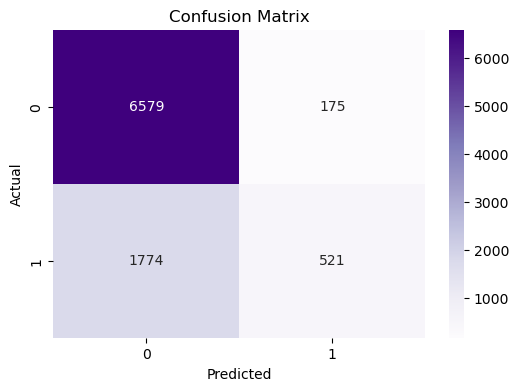

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_NBC), annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# K Nearest neighboors

## After trying with different neighboors above K = 3, The most accuracy had K = 15

classification model accuracy with k = 5: 81.77% \n
classification model accuracy with k = 7: 82.76%
classification model accuracy with k = 9: 83.08%
classification model accuracy with k = 11: 83.30%
classification model accuracy with k = 15: 83.46%
classification model accuracy with k = 17: 83.30%

In [37]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred_KNN = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred_KNN) * 100
print(f"KNN classification model accuracy with k = 15: {acc:.2f}%")

KNN classification model accuracy with k = 15: 83.46%


In [39]:
y_prob = model.predict_proba(X_test)[:, 1]

results.append({
        "Model": "K Nearest neighboors",
        "Accuracy": accuracy_score(y_test, y_pred_KNN),
        "Precision": precision_score(y_test, y_pred_KNN, zero_division=0),
        "Recall": recall_score(y_test, y_pred_KNN, zero_division=0),
        "F1-score": f1_score(y_test, y_pred_KNN, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

/home/ioanna/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


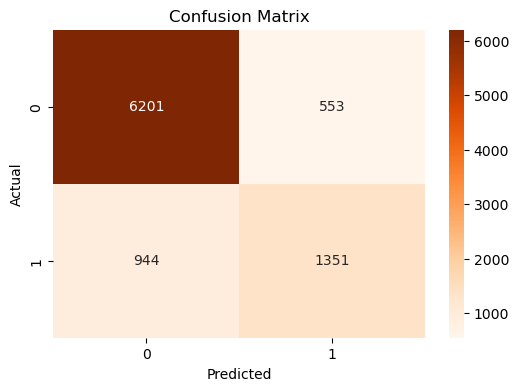

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [41]:


# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [42]:
y_pred_XGBoost = xgb_clf.predict(X_test)


acc = accuracy_score(y_test, y_pred_XGBoost) * 100
print(f"KNN classification model accuracy: {acc:.2f}%")

KNN classification model accuracy: 85.74%


In [43]:
y_prob = model.predict_proba(X_test)[:, 1]

results.append({
        "Model": "XHBoost",
        "Accuracy": accuracy_score(y_test, y_pred_DTC),
        "Precision": precision_score(y_test, y_pred_DTC, zero_division=0),
        "Recall": recall_score(y_test, y_pred_DTC, zero_division=0),
        "F1-score": f1_score(y_test, y_pred_DTC, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

/home/ioanna/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


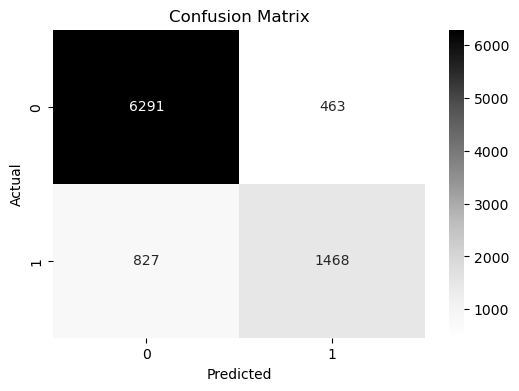

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_XGBoost), annot=True, fmt='d', cmap='Grays')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

 Accuracy: measures the overall proportion of correct predictions made by the model.
 Precision: measures how reliable the model's positive predictions are (low false positives).
 Recall: measures the model’s ability to correctly identify all actual positive cases (low false negatives).
 F1-score: balances precision and recall into a single metric, especially useful for imbalanced datasets.
 ROC-AUC: measures the model’s ability to distinguish between classes across all decision thresholds.


In [45]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Decision Tree,0.843629,0.746085,0.581264,0.653441,0.890732
1,Random Forest,0.838325,0.709677,0.613508,0.658098,0.890732
2,Logistic Regretion,0.803514,0.705976,0.386057,0.499155,0.890732
3,Naive Bayes,0.784617,0.748563,0.227015,0.348378,0.859529
4,K Nearest neighboors,0.834567,0.709559,0.588671,0.643487,0.524290
5,XHBoost,0.843629,0.746085,0.581264,0.653441,0.524290


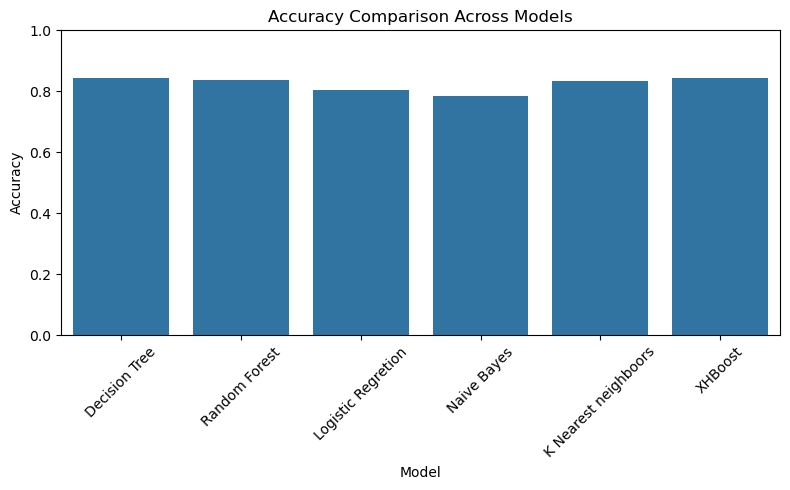

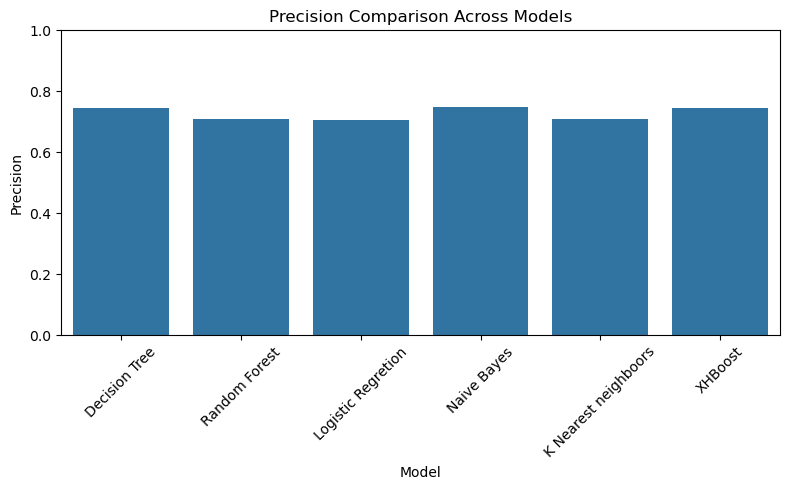

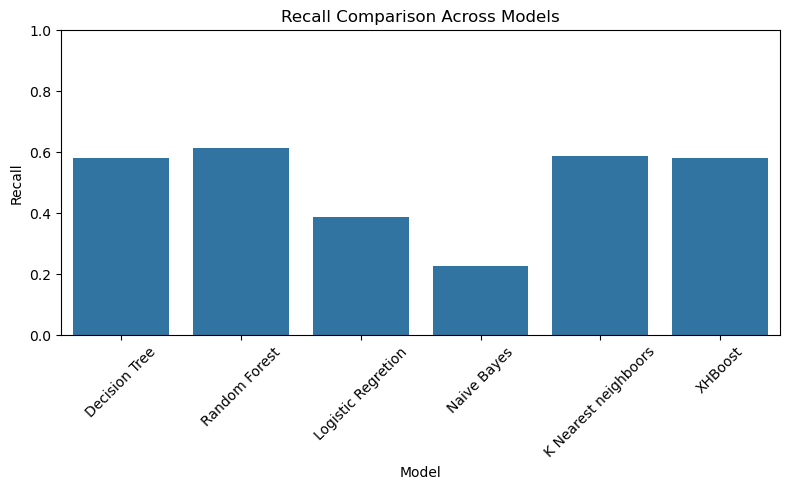

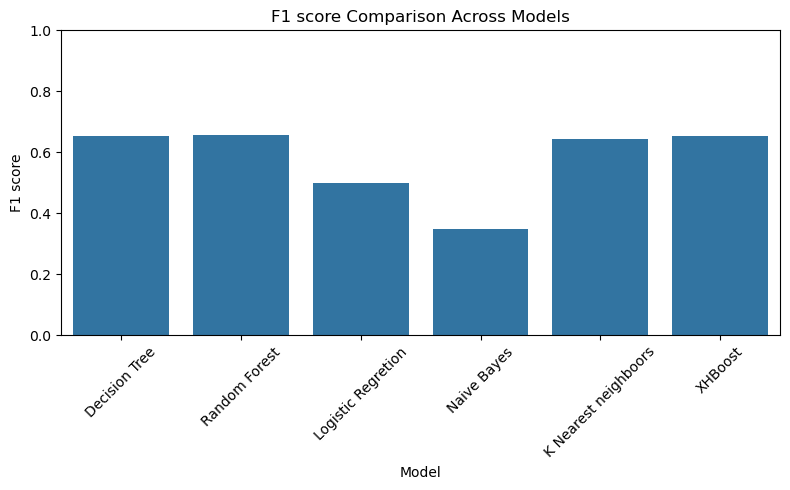

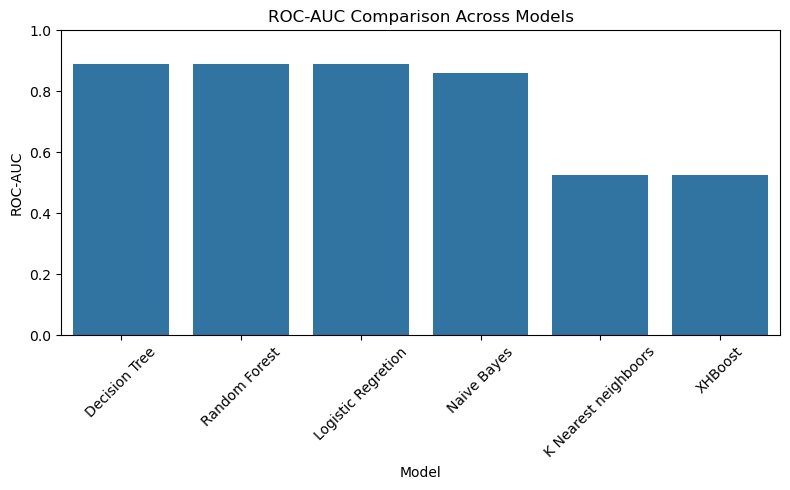

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns




plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df,
    x="Model",
    y="Accuracy"
)

plt.ylim(0, 1)  # <-- FIXED SCALE
plt.title("Accuracy Comparison Across Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df,
    x="Model",
    y="Precision"
)

plt.ylim(0, 1)  # <-- FIXED SCALE
plt.title("Precision Comparison Across Models")
plt.ylabel("Precision")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df,
    x="Model",
    y="Recall"
)

plt.ylim(0, 1)  # <-- FIXED SCALE
plt.title("Recall Comparison Across Models")
plt.ylabel("Recall")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df,
    x="Model",
    y="F1-score"
)

plt.ylim(0, 1)  # <-- FIXED SCALE
plt.title("F1 score Comparison Across Models")
plt.ylabel("F1 score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df,
    x="Model",
    y="ROC-AUC"
)

plt.ylim(0, 1)  # <-- FIXED SCALE
plt.title("ROC-AUC Comparison Across Models")
plt.ylabel("ROC-AUC")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
